In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930]), array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32]))
-11.528838507442742


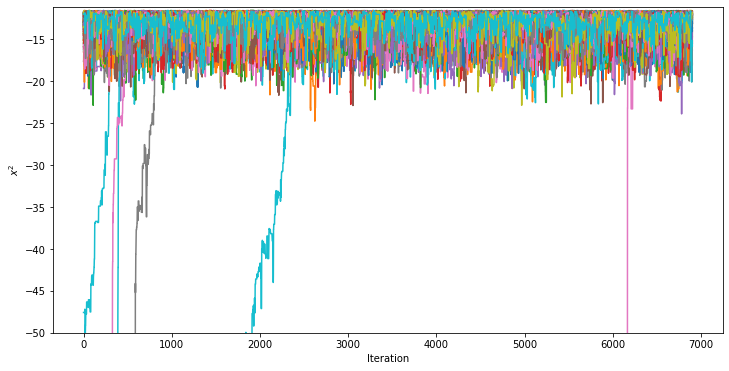

In [8]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

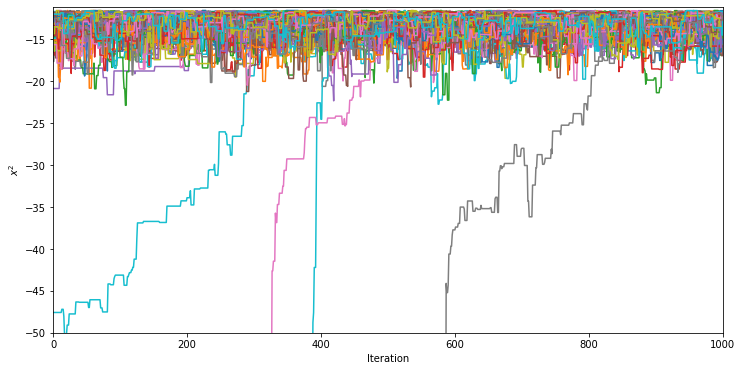

In [10]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [11]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([1365., 1403., 1412., 1387., 1393., 1455., 1435., 1375., 1413.,
       1363., 1422., 1329., 1327., 1428.,   58., 1381., 1347., 1464.,
       1361., 1352., 1465., 1429., 1340., 1408., 1286., 1407., 1299.,
       1377., 1408., 1401., 1401., 1390., 1379., 1400., 1362., 1399.,
       1456., 1407., 1416., 1312., 1359., 1427., 1424., 1373., 1417.,
       1362.,  186., 1342.,   78., 1376., 1377., 1387., 1430., 1397.,
       1484., 1418., 1362., 1371., 1312., 1418., 1375., 1348., 1410.,
       1436., 1306., 1405., 1439.,  138., 1431., 1373., 1452., 1381.,
       1415.,  235., 1400., 1464., 1374., 1388., 1403., 1371., 1384.,
       1365., 1475., 1390., 1412., 1424., 1456., 1382., 1407., 1470.,
       1406., 1351., 1364., 1411., 1421., 1299., 1401., 1361., 1388.,
       1424.,   37., 1337., 1370., 1411., 1423., 1422., 1394., 1413.,
       1377., 1421., 1407., 1343.,   50., 1396., 1433., 1393., 1392.,
       1410., 1375., 1444.])

[67.56080301 61.28006872 64.09628566 39.48493201]
flat chain shape: (828000, 4)
flat log prob shape: (828000,)


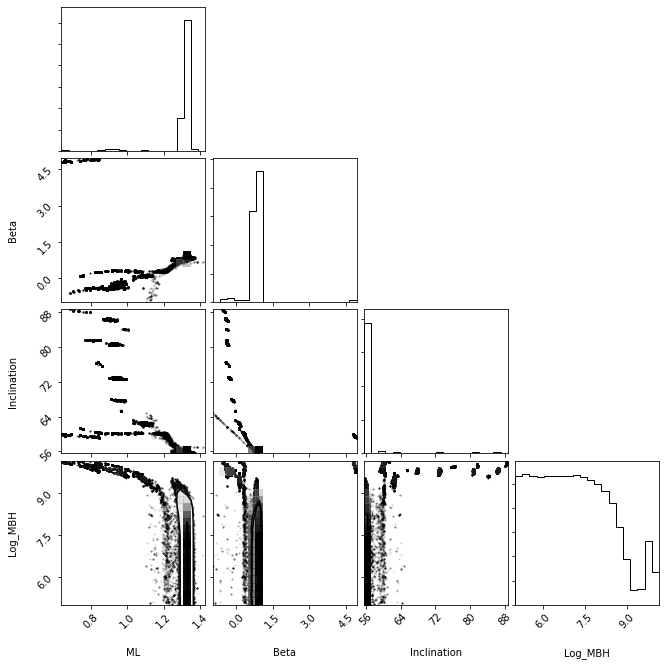

In [13]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [15]:
tau = read.get_autocorr_time()
tau

array([67.56080301, 61.28006872, 64.09628566, 39.48493201])

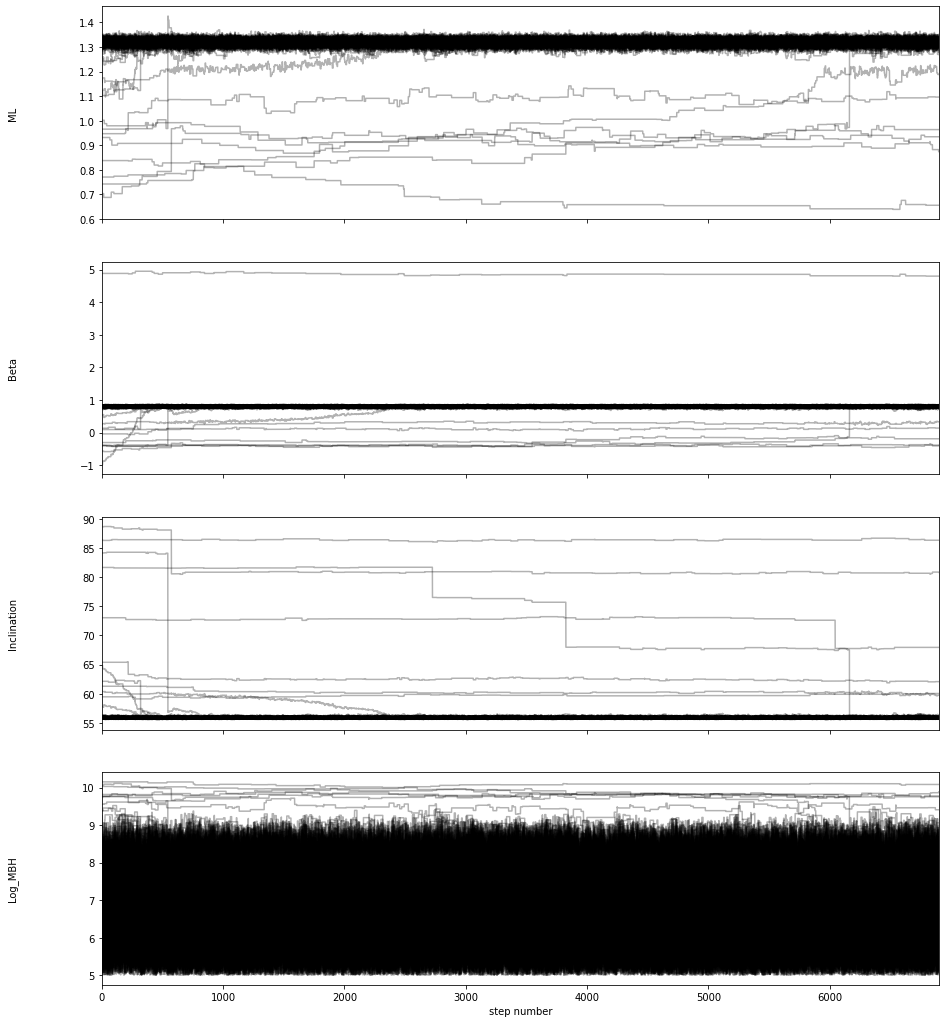

In [17]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [18]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

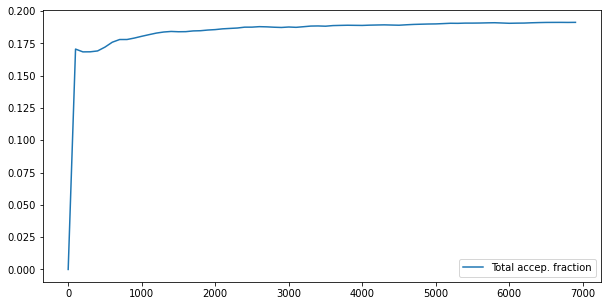

In [19]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

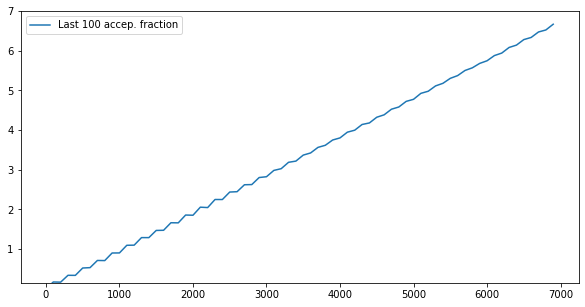

In [20]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()